
Let’s correct it and do the **actual Day 12 challenge: Social Media Analysis** 🎯

---

### 📝 Problem Statement (Day 12 – Social Media Analysis) 📱📊

A company tracks engagement on its social media posts. The dataset includes:

* Post ID
* Post Type (Image, Video, Text, Link)
* Likes
* Comments
* Shares

#### Tasks:

1. Load the dataset using **Pandas**.
2. Find the **most engaging post type** (based on total likes + comments + shares).
3. Calculate the **average engagement per post type**.
4. Identify the **top 3 most engaging posts**.
5. Visualize insights using **Matplotlib & Seaborn**:

   * **Bar chart** → Average engagement per post type
   * **Scatter plot** → Likes vs Comments (to see correlation)




In [2]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("social_media_data_day12.csv")


In [7]:
df.head()

,Post ID,Post Type,Likes,Comments,Shares
0,1,Text,711,179,179
1,2,Link,358,197,39
2,3,Image,819,280,85
3,4,Text,393,199,168
4,5,Text,541,184,54


In [8]:
df["Total Engagement"] = df["Likes"] + df["Comments"] + df["Shares"]
engagement_by_type = df.groupby("Post Type")["Total Engagement"].sum().sort_values(ascending=False)
most_engaging_type = engagement_by_type.idxmax()



In [9]:
df.head()

,Post ID,Post Type,Likes,Comments,Shares,Total Engagement
0,1,Text,711,179,179,1069
1,2,Link,358,197,39,594
2,3,Image,819,280,85,1184
3,4,Text,393,199,168,760
4,5,Text,541,184,54,779


In [15]:

avg_engagement_by_type = df.groupby("Post Type")["Total Engagement"].mean()

avg_engagement_by_type

Post Type
Image    1007.250000
Link      759.166667
Text      635.333333
Video     528.000000
Name: Total Engagement, dtype: float64

In [16]:

top3_posts = df.nlargest(3, "Total Engagement")[["Post ID", "Post Type", "Total Engagement"]]

top3_posts

,Post ID,Post Type,Total Engagement
16,17,Link,1346
2,3,Image,1184
15,16,Image,1096


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4320\999123288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement_by_type.index, y=avg_engagement_by_type.values, palette="viridis")


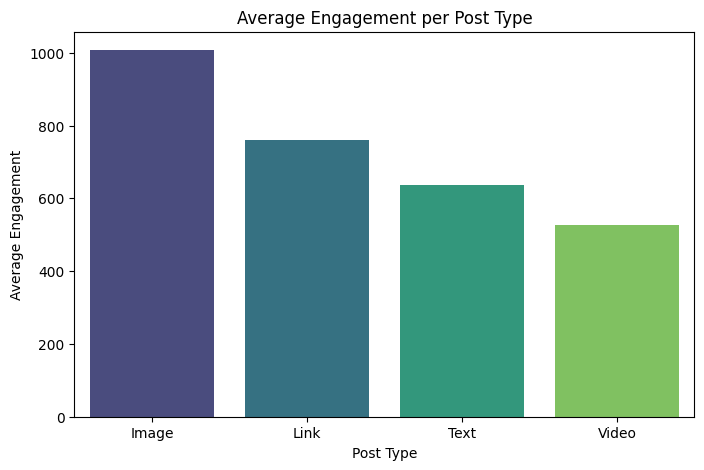

In [12]:

plt.figure(figsize=(8,5))
sns.barplot(x=avg_engagement_by_type.index, y=avg_engagement_by_type.values, palette="viridis")
plt.title("Average Engagement per Post Type")
plt.ylabel("Average Engagement")
plt.xlabel("Post Type")
plt.show()



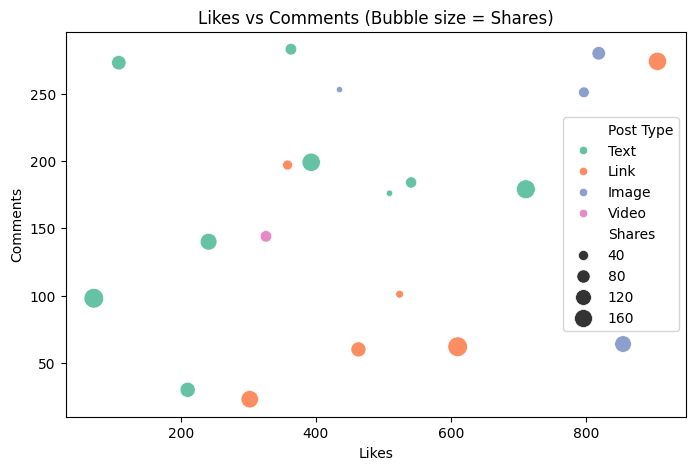

(Post Type
 Text     5718
 Link     4555
 Image    4029
 Video     528
 Name: Total Engagement, dtype: int64,
 'Text',
 Post Type
 Image    1007.250000
 Link      759.166667
 Text      635.333333
 Video     528.000000
 Name: Total Engagement, dtype: float64,
     Post ID Post Type  Total Engagement
 16       17      Link              1346
 2         3     Image              1184
 15       16     Image              1096)

In [13]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Likes", y="Comments", hue="Post Type", size="Shares", palette="Set2", sizes=(20,200))
plt.title("Likes vs Comments (Bubble size = Shares)")
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.show()

engagement_by_type, most_engaging_type, avg_engagement_by_type, top3_posts
